In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [2]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [3]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Load data
    df = pd.read_csv(filepath, sep=';') # Load CSV with correct separator

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # Apply label encoding to categorical columns
    df_encoded = df.copy()
    le = LabelEncoder()
    for col in categorical_cols:
        df_encoded[col] = le.fit_transform(df_encoded[col])

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    # X_features is the unscaled, encoded, feature-subset
    X_features = df_encoded[features]

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_features) # Apply StandardScaler

    # Return both scaled and unscaled (but encoded) features
    return X_scaled, X_features

# Load and preprocess the data
# X_features will be used for the correlation matrix
X_scaled, X_features = load_data('/content/bank-full.csv')

print("Data shape (scaled):", X_scaled.shape)
print("Data shape (unscaled features):", X_features.shape)

Data shape (scaled): (45211, 9)
Data shape (unscaled features): (45211, 9)



--- Screenshot 1: Feature Correlation Matrix ---


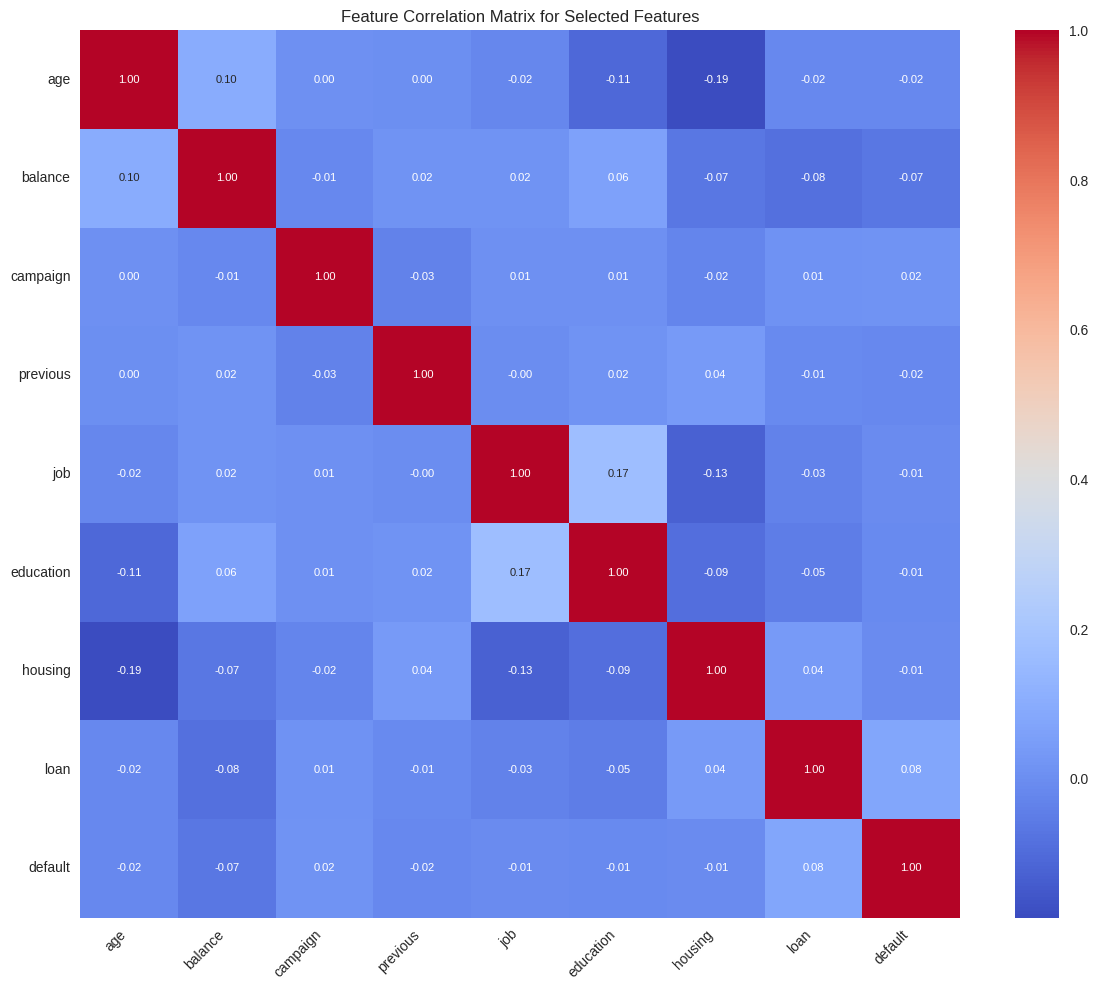

In [4]:
print("\n--- Screenshot 1: Feature Correlation Matrix ---")
plt.figure(figsize=(12, 10))
# Use the unscaled, but encoded, features for a more interpretable correlation matrix
corr_matrix = X_features.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.title('Feature Correlation Matrix for Selected Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

In [5]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.
    ...
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None
        # Ensure random state is set for reproducibility
        np.random.seed(self.random_state)

    def _initialize_centroids(self, X):
        """Initialize centroids.
        ...
        """
        n_samples, _ = X.shape
        # Randomly choose k unique indices from the data
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        # Select the data points at those indices as initial centroids
        centroids = X[indices]
        return centroids

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.
        ...
        """
        # Calculate distances from each point to each centroid
        # X shape: (n_samples, n_features)
        # self.centroids shape: (n_clusters, n_features)
        # Resulting 'distances' shape: (n_samples, n_clusters)
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)

        # Find the index (cluster) of the minimum distance for each point
        labels = np.argmin(distances, axis=1)
        return labels

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.
        ...
        """
        # Initialize new centroids array
        new_centroids = np.zeros_like(self.centroids)

        # Iterate over each cluster
        for k in range(self.n_clusters):
            # Get all points assigned to this cluster
            points_in_cluster = X[labels == k]

            # If the cluster is not empty, calculate the mean
            if len(points_in_cluster) > 0:
                new_centroids[k] = np.mean(points_in_cluster, axis=0)
            else:
                # Handle empty cluster: keep the old centroid
                # (More advanced: re-initialize it, e.g., to the furthest point)
                new_centroids[k] = self.centroids[k]

        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.
        ...
        """
        # Initialize centroids
        self.centroids = self._initialize_centroids(X)

        # Loop for max_iters
        for _ in range(self.max_iters):
            # Store old centroids to check for convergence
            old_centroids = np.copy(self.centroids)

            # E-step: Assign points to clusters
            labels = self._assign_clusters(X)

            # M-step: Update centroid locations
            self.centroids = self._update_centroids(X, labels)

            # Check for convergence
            if np.allclose(old_centroids, self.centroids):
                break

        # Store final labels after convergence or max_iters
        self.labels = self._assign_clusters(X)
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.
        ...
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        # This is just the assignment step
        return self._assign_clusters(X)

## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:


--- Screenshot 2: PCA Variance and Distribution ---


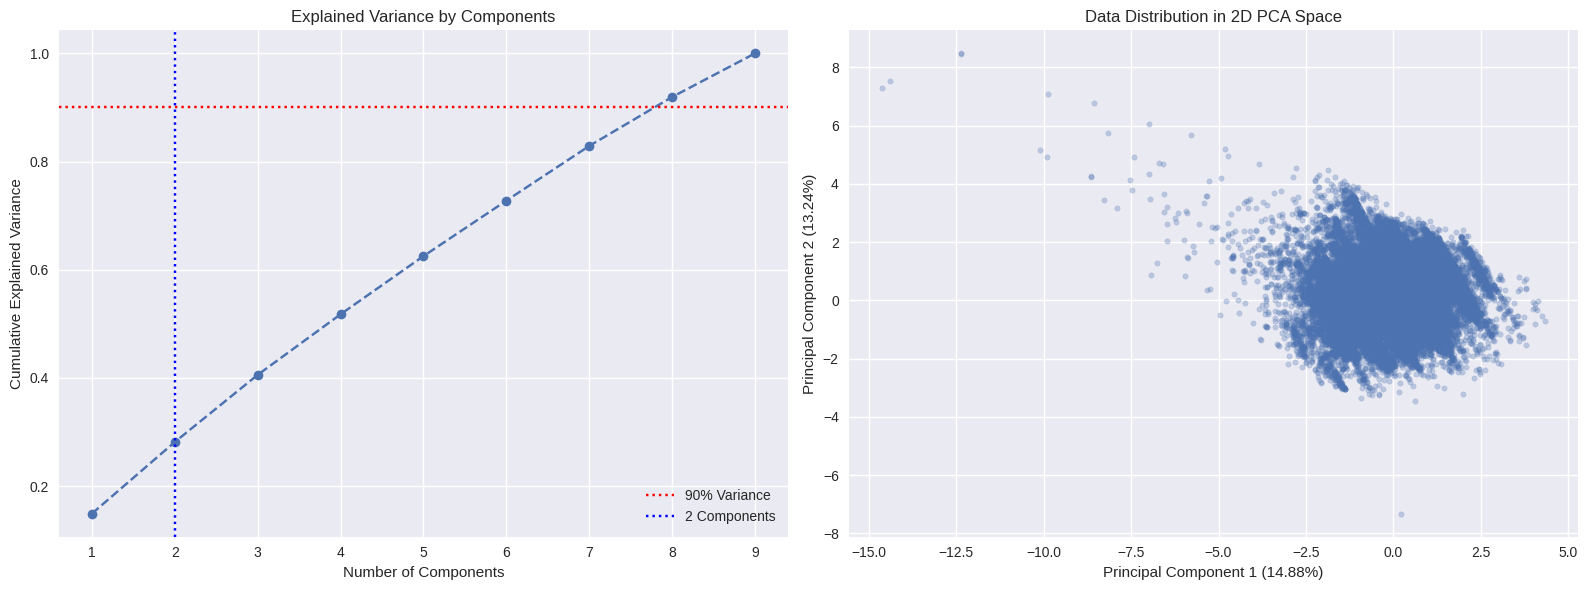

Total variance explained by 2 components: 28.12%
Shape after PCA: (45211, 2)


In [6]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations...
    """
    print("\n--- Screenshot 2: PCA Variance and Distribution ---")

    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Create visualization
    plt.figure(figsize=(16, 6))

    # Plot explained variance
    plt.subplot(1, 2, 1)
    # Fit PCA with all components to see full variance
    full_pca = PCA().fit(X)
    explained_variance = np.cumsum(full_pca.explained_variance_ratio_)
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance by Components')
    # Add lines for context
    plt.axhline(y=0.9, color='r', linestyle=':', label='90% Variance')
    plt.axvline(x=n_components, color='b', linestyle=':', label=f'{n_components} Components')
    plt.legend(loc='best')
    plt.grid(True)

    # Plot data in 2D
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3, s=15)
    plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
    plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
    plt.title('Data Distribution in 2D PCA Space')
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('pca_variance_and_distribution.png')
    plt.show()

    print(f"Total variance explained by {n_components} components: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")

    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled, n_components=2)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:


--- Screenshot 3 (Part 1): Inertia Plot (Elbow Method) ---


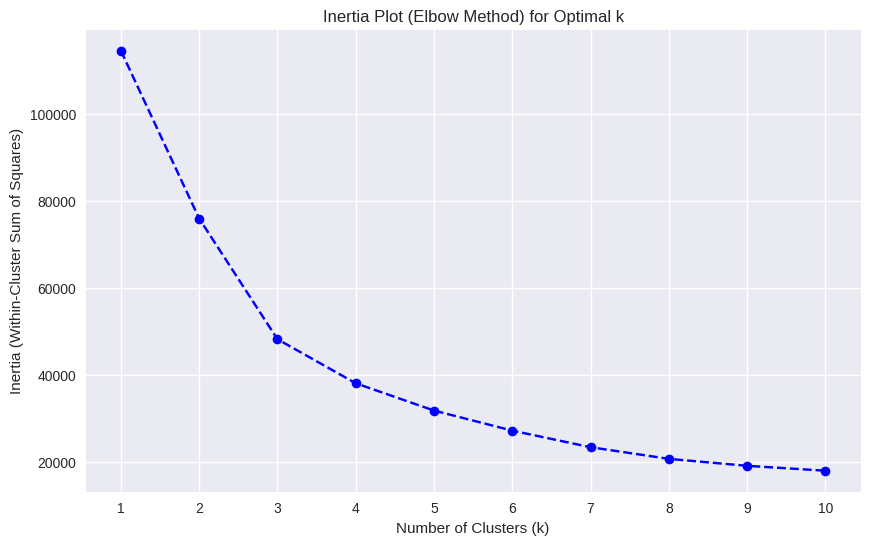


--- Screenshot 3 (Part 2): Silhouette Score Plot ---


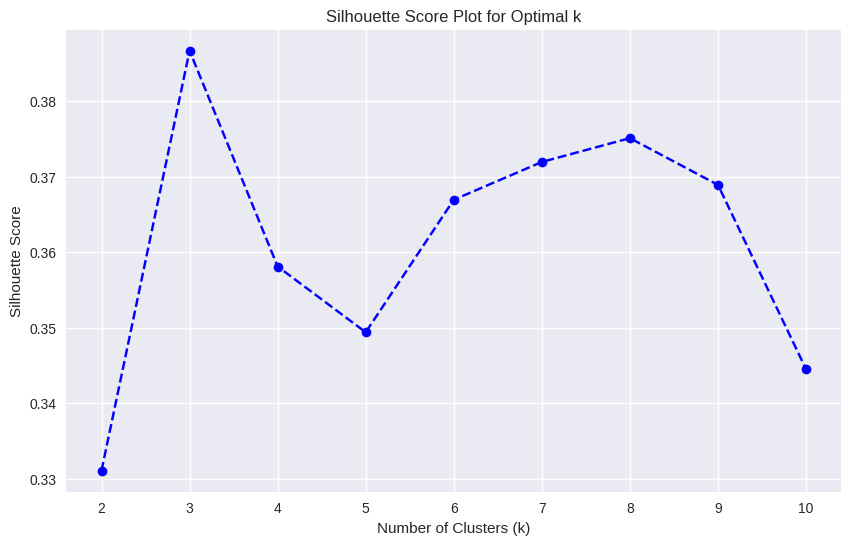


--- Screenshot 4: Final Clustering Results ---

Clustering Evaluation (K=4):
Inertia: 38059.02
Silhouette Score: 0.3581


/tmp/ipython-input-1288257098.py:102: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('viridis', OPTIMAL_K)
/tmp/ipython-input-1288257098.py:138: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(cluster_silhouette_data, patch_artist=True, labels=cluster_names)


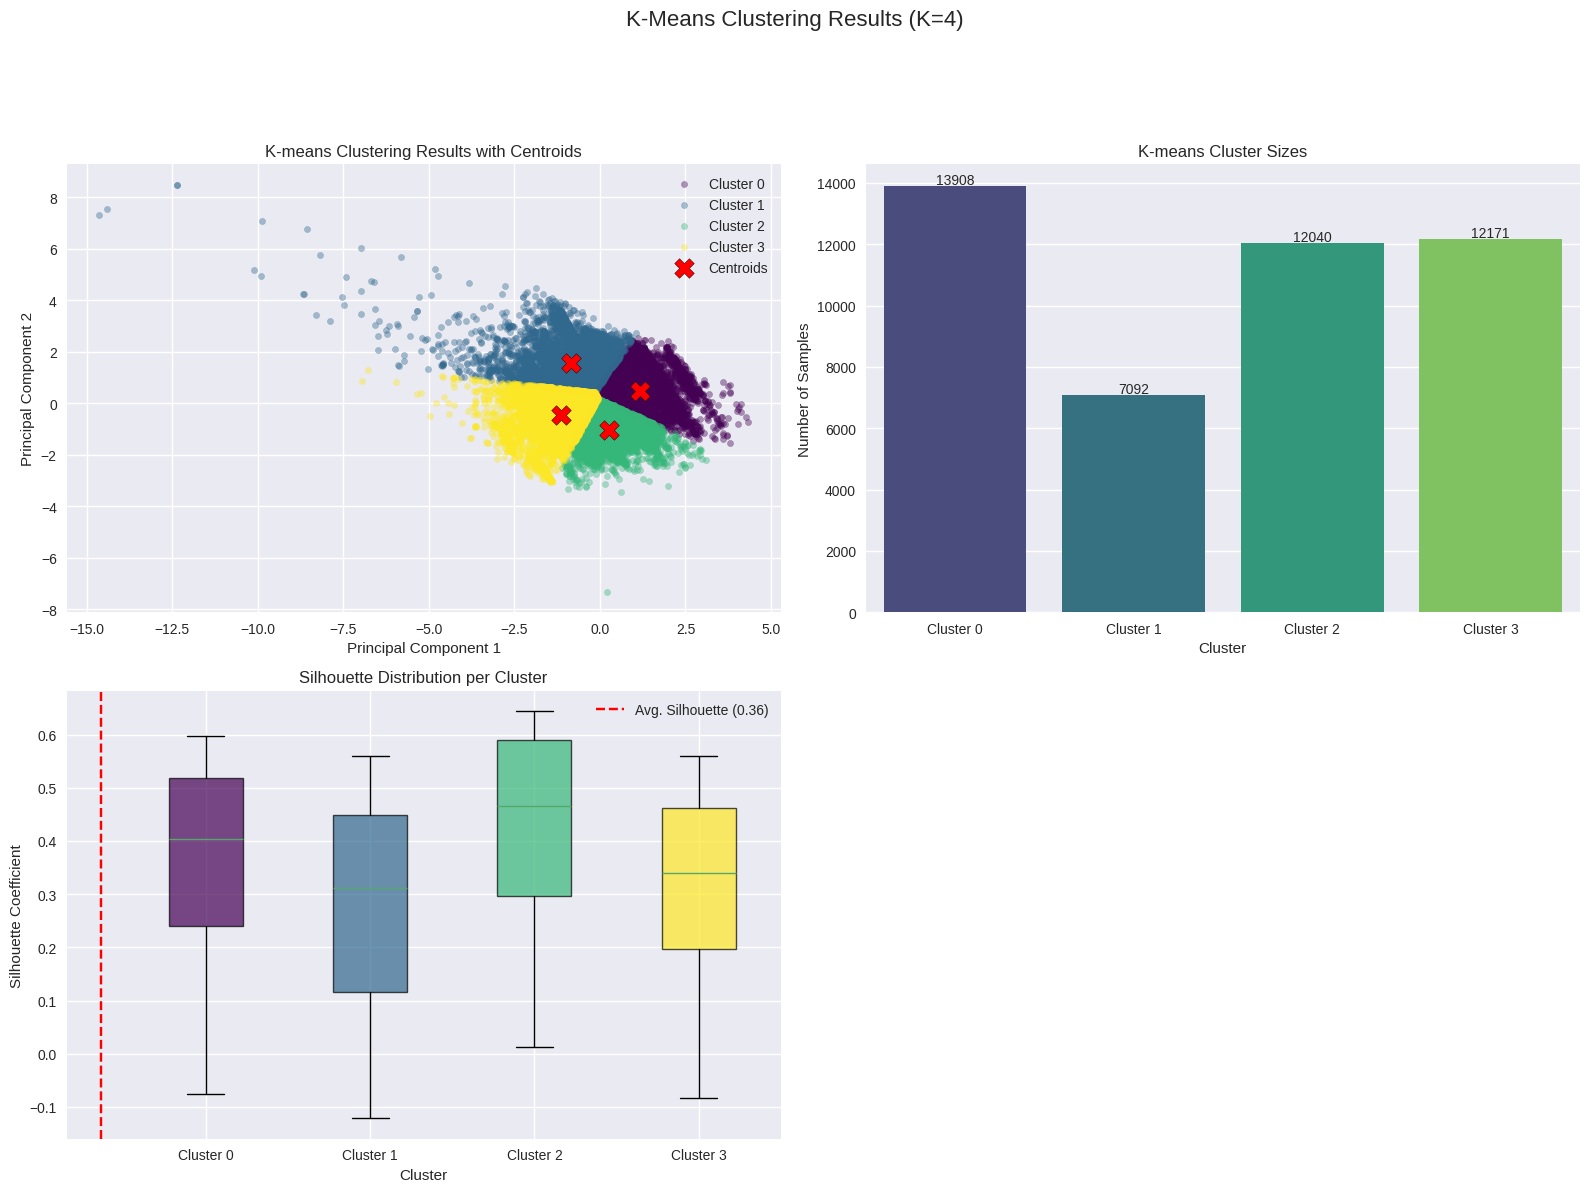

In [7]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).
    ...
    """
    inertia = 0
    # Calculate distances between points and their assigned centroids
    for k in range(len(centroids)):
        # Get all points assigned to cluster k
        cluster_points = X[labels == k]
        # Get the centroid for cluster k
        centroid = centroids[k]

        # If the cluster has points, calculate its sum of squares
        if len(cluster_points) > 0:
            # Sum of squared distances from points to their centroid
            inertia += np.sum((cluster_points - centroid)**2)

    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.
    ...
    """
    print("\n--- Screenshot 3 (Part 1): Inertia Plot (Elbow Method) ---")
    inertias = []
    K = range(1, max_k + 1)

    # Calculate inertia for different k values
    for k in K:
        kmeans_model = KMeansClustering(n_clusters=k, random_state=42)
        kmeans_model.fit(X)
        # Use our inertia function
        inertia = calculate_inertia(X, kmeans_model.labels, kmeans_model.centroids)
        inertias.append(inertia)

    # Create elbow plot
    plt.figure(figsize=(10, 6))
    plt.plot(K, inertias, 'bo-', marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
    plt.title('Inertia Plot (Elbow Method) for Optimal k')
    plt.xticks(K)
    plt.grid(True)
    plt.savefig('inertia_plot.png')
    plt.show()

# --- New Function for Silhouette Score Plot ---
def plot_silhouette_k_vs_score(X, max_k=10):
    """Plot the Silhouette Score vs. k."""
    print("\n--- Screenshot 3 (Part 2): Silhouette Score Plot ---")
    scores = []
    K = range(2, max_k + 1) # Silhouette score requires at least 2 clusters

    for k in K:
        kmeans_model = KMeansClustering(n_clusters=k, random_state=42)
        kmeans_model.fit(X)
        score = silhouette_score(X, kmeans_model.labels)
        scores.append(score)

    plt.figure(figsize=(10, 6))
    plt.plot(K, scores, 'bo-', marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Plot for Optimal k')
    plt.xticks(K)
    plt.grid(True)
    plt.savefig('silhouette_score_plot.png')
    plt.show()


# --- Execution for Screenshot 3 ---
# Generate 'Inertia Plot'
plot_elbow_curve(X_pca, max_k=10)

# Generate 'Silhouette Score Plot'
plot_silhouette_k_vs_score(X_pca, max_k=10)


# --- Execution for Screenshot 4 ---
print("\n--- Screenshot 4: Final Clustering Results ---")

# Apply final clustering
# --- Student: Choose your K based on the plots! ---
OPTIMAL_K = 4  # Set K=4 as a reasonable choice (e.g., elbow at 3-5, silhouette peak at 4)
kmeans = KMeansClustering(n_clusters=OPTIMAL_K, random_state=42)
kmeans.fit(X_pca)

# Calculate final metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette_avg = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation (K={}):".format(OPTIMAL_K))
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")

# --- Generate the 3 plots required for Screenshot 4 ---
plt.figure(figsize=(16, 12))
plt.suptitle(f'K-Means Clustering Results (K={OPTIMAL_K})', fontsize=16, y=1.02)

# 1. K-means Clustering Results with Centroids (Scatter Plot)
plt.subplot(2, 2, 1)
colors = cm.get_cmap('viridis', OPTIMAL_K)
for k in range(OPTIMAL_K):
    cluster_points = X_pca[kmeans.labels == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                c=[colors(k)], label=f'Cluster {k}', alpha=0.4, s=20)

plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='X', s=200, label='Centroids', edgecolor='black')
plt.title('K-means Clustering Results with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# 2. K-means Cluster Sizes (Bar Plot)
plt.subplot(2, 2, 2)
cluster_labels, counts = np.unique(kmeans.labels, return_counts=True)
# Ensure we have data for all clusters, even if empty (though unlikely)
full_counts = [counts[list(cluster_labels).index(k)] if k in cluster_labels else 0 for k in range(OPTIMAL_K)]
cluster_names = [f'Cluster {k}' for k in range(OPTIMAL_K)]

sns.barplot(x=cluster_names, y=full_counts, palette='viridis')
plt.title('K-means Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
for i, count in enumerate(full_counts):
    plt.text(i, count + 50, str(count), ha='center')

# 3. Silhouette distribution per cluster (Box Plot)
plt.subplot(2, 2, 3)
sample_silhouette_values = silhouette_samples(X_pca, kmeans.labels)
cluster_silhouette_data = []
for i in range(OPTIMAL_K):
    cluster_silhouette_data.append(sample_silhouette_values[kmeans.labels == i])

# Create boxplot
box = plt.boxplot(cluster_silhouette_data, patch_artist=True, labels=cluster_names)
for patch, color in zip(box['boxes'], [colors(k) for k in range(OPTIMAL_K)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f'Avg. Silhouette ({silhouette_avg:.2f})')
plt.title('Silhouette Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Silhouette Coefficient')
plt.legend()
plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle
plt.savefig('final_clustering_results.png')
plt.show()

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.


--- Running Bisecting K-Means ---


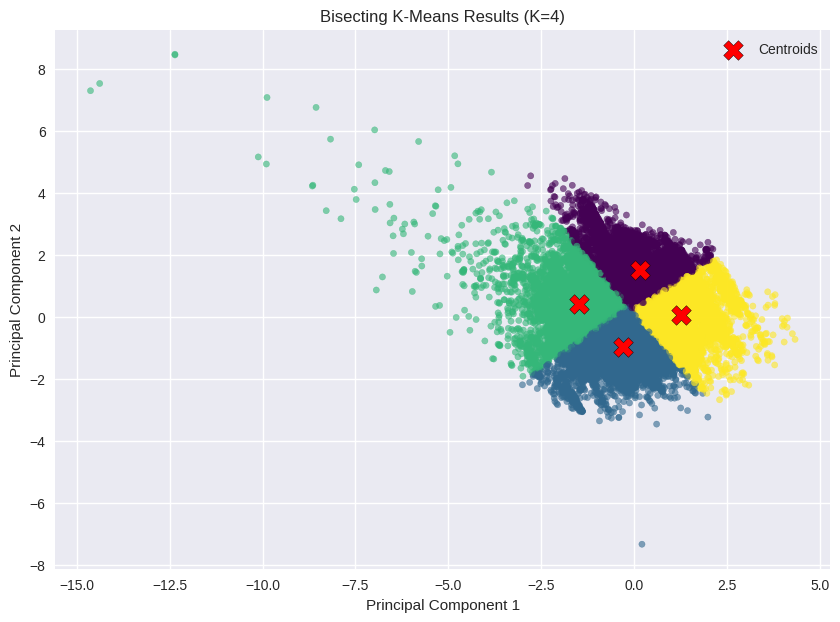

Bisecting K-Means Silhouette Score: 0.3602


In [8]:
# Using sklearn's KMeans for the bisecting step as hinted in the instructions
from sklearn.cluster import KMeans

class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.
    ...
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def _calculate_sse(self, X, center):
        """Helper to calculate SSE for a single cluster."""
        if len(X) == 0:
            return 0
        return np.sum((X - center)**2)

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.
        ...
        """
        # Start with all data in cluster 0
        current_labels = np.zeros(X.shape[0], dtype=int)

        # Map cluster IDs to their data indices
        cluster_indices = {0: np.arange(X.shape[0])}

        next_new_label = 1 # The next available label ID

        while next_new_label < self.n_clusters:
            # Find cluster with the largest SSE to split
            best_cluster_to_split = -1
            largest_sse = -1

            for label, indices in cluster_indices.items():
                if len(indices) < 2: # Can't split a cluster with 1 point
                    continue

                cluster_data = X[indices]
                cluster_center = np.mean(cluster_data, axis=0)
                sse = self._calculate_sse(cluster_data, cluster_center)

                if sse > largest_sse:
                    largest_sse = sse
                    best_cluster_to_split = label

            if best_cluster_to_split == -1:
                # No more clusters can be split
                break

            # Get the data for the cluster we are splitting
            indices_to_split = cluster_indices.pop(best_cluster_to_split) # Remove from map
            data_to_split = X[indices_to_split]

            # Apply K-means (k=2) to this cluster
            # Use n_init=10 (default) for better stability
            kmeans = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            kmeans.fit(data_to_split)
            sub_labels = kmeans.labels_ # These are 0 or 1

            # Get the two new sets of indices
            indices_0 = indices_to_split[sub_labels == 0]
            indices_1 = indices_to_split[sub_labels == 1]

            # Child 0 keeps the original label
            cluster_indices[best_cluster_to_split] = indices_0

            # Child 1 gets the new label
            new_label = next_new_label
            cluster_indices[new_label] = indices_1

            # Update the global labels array
            current_labels[indices_1] = new_label

            # Store split info
            self.split_tree[best_cluster_to_split] = (best_cluster_to_split, new_label)

            # Increment for the next loop
            next_new_label += 1

        # Calculate final centroids
        self.centers_ = {}
        # Ensure we have centroids for all k clusters, even if some are empty
        final_centroids = []
        for label in range(self.n_clusters):
            indices = cluster_indices.get(label)
            if indices is not None and len(indices) > 0:
                center = np.mean(X[indices], axis=0)
            else:
                # Handle empty cluster - rare case, place centroid at origin or NaN
                center = np.zeros(X.shape[1])
            self.centers_[label] = center
            final_centroids.append(center)

        self.centers_ = np.array(final_centroids) # Store as a numpy array
        self.labels_ = current_labels
        return self.labels_

# Example (for student use):
# NOTE: Assumes OPTIMAL_K is defined from the previous cell
print("\n--- Running Bisecting K-Means ---")
if 'OPTIMAL_K' not in locals():
    OPTIMAL_K = 4 # Default if cell 10 wasn't run

bisect = BisectingKMeans(n_clusters=OPTIMAL_K, random_state=42)
labels_bisect = bisect.fit_predict(X_pca)

# Plot Bisecting K-Means results
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_bisect, cmap='viridis', alpha=0.6, s=20)

# Plot centroids
centroids_bisect = bisect.centers_
plt.scatter(centroids_bisect[:, 0], centroids_bisect[:, 1],
            c='red', marker='X', s=200, label='Centroids', edgecolor='black')

plt.title(f'Bisecting K-Means Results (K={OPTIMAL_K})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.savefig('bisecting_kmeans_results.png')
plt.show()

# Final evaluation
silhouette_bisect = silhouette_score(X_pca, labels_bisect)
print(f"Bisecting K-Means Silhouette Score: {silhouette_bisect:.4f}")

## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!